$$
\text{COMP5930M Scientific Computation - Coursework 1}
$$

$$
\text{Author: James Baxter Chapman}
$$
$$
\text{Date: 18th November 2024}
$$



**Exercise 1**: We wish to solve numerically the nonlinear equation
$$
f(x) = \exp(-x^3)\sin(x)+x^2 -x = 0 \tag{1}
$$
**(a)** Identify the approximate solutions $x^*$ s.t $f(x^*)=0$ that this equation has in the interval $[-1.1]$. Use e.g. graphical analysis. 
**[2 Marks]**

Graphical analysis is when you plot the function within specified bounds and visually determine when the function is equal to 0, a.k.a when it crosses the x-axis. The plot for the nonlinear function can be seen below:

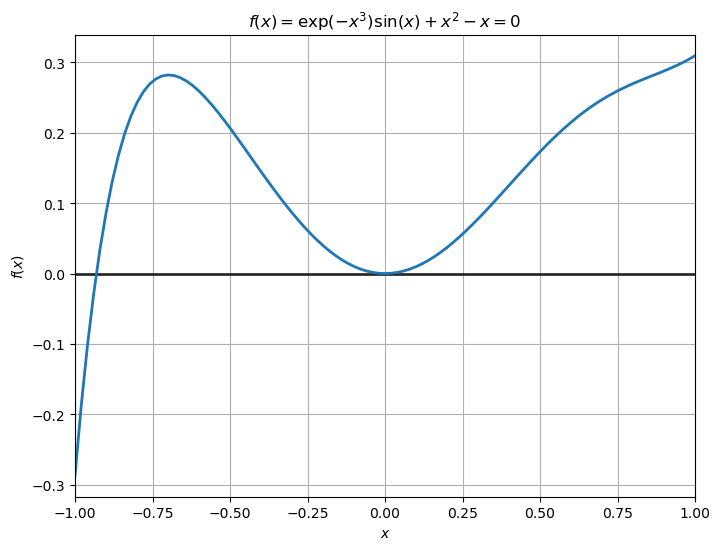

In [269]:
import numpy as np 
import matplotlib.pyplot as plt

def function(x):
    power = - x **3
    return (np.e ** power) * np.sin(x) + x**2 - x

x = np.linspace(-1,1,101)
zeros = np.zeros(len(x))
plt.figure(figsize=(8, 6))
plt.plot(x, zeros, color='black', lw=2, alpha=0.8)
plt.plot(x, function(x), lw=2)
plt.xlim(-1,1)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'$f(x) = \exp(-x^3)\sin(x) + x^2 - x = 0$')
plt.grid()

Visually it can be seen that the function $f(x) = 0$ has two solution within the bounds $[-1,1]$. One of these is at $x=0$, which can be tested easily as $f(0) = \exp(0)\sin(0) + 0 - 0 = 0$. The other solution has to be approximated, and by inspection it is given as $x^* \approx -0.93$. To get a more accurate solution, numerical methods can be employed.

**(b)** Analyse each real solution $x^* \in [-1,1]$ and determine:
1. What is the convergence order of Newton near that solution? Justify your answer by appealing to the theory of Newton's method and properties of the function $f$.
2. Can the bisection method converge to the solution from some initial bracket $[x_L, x_R]$? Justify your answer by appealing to the theory of bisection method and properties of $f$. **[8 Marks]**

The Newton method is given by the following formula:
$$
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)} \tag{2}
$$
The Newton method usually has a Quadratic convergence order, however in the case where there is a critical point, so $f'(x^*) = 0$, the convergence rate of Newton's Method decreases to linear or sublinear. We say that the sequence converges linearly if there exists $0 < \alpha < 1$ and

$$
\lim _{n \to \infty} \frac{ \left| x^* - x_{n+1} \right| }{ \left| x^* - x_{n} \right|^q } = \alpha \tag{3}
$$

and sublinearly when $\alpha = 1$. As $n \to \infty$, the derivative at a critical point $f'(x_n) \to 0$, and the method approaches a solution, so $f(x_n) \to 0$.  $\frac{f(x_n)}{f'(x_n)} \text{ tends to } 1$. This means that our tangent line is essentially flat because the gradient is so shallow, and has much lower dominance on the next iteration.  Therefore for our nonlinear function given by (1), the convergence order of the Newton method is linear or sublinear near the critical point at $x^* = 0$. 

For the other solution at $x^* \approx -0.93$, since $f(x)$ is continuously differentiable and $f'(x^*) \neq 0$, so long as the initial guess is sufficiently close the convergence order is quadratic at this solution.

The Newton method does not garuantee to converge onto any or all solutions $x^*$ depending on the function, and in this case the Newton method cannot find the solution $x^* \approx -0.93$. This is because the higher derivatives of this function are too great near this solution, and also negative. The $\exp(-x^3)$ term dominates the function as $|x|$ increases and the prediction diverges away from the solution.

An alternative method is the Bisection method, which garuantees a solution $x^*$ is found from an initial bracket $[x_L, x_R]$. The bisection method algorithm is given by:

Consider the point $x_C^{n} = (x_L^n + x_R^n)/2$ and find $f(x_C^n)$.
- If $x_L^n x_C^n \le 0$, then $x^* \in [x_L^n, x_C^n]$.
- If $x_C^n x_R^n < 0$, then $x^* \in [x_C^n, x_R^n]$.

Select the new interval $[x_L ^{n+1}, x_R^{n+1}]$ as the subinterval containing $x^*$.

Repeat this process until $x_R^n - x_L^n < tol$, where the tolerance is a user specified value.

The initial error is given by $\epsilon _0 = \left| x^* - x_C^0 \right| \le (x_R^0 - x_L^0)/2$. At each iteration, since the bracket interval is halved in size, the error is also halved. 
$$
\epsilon _0 = \left| x^* - x_C^0 \right| \le \frac{(x_R^n - x_L^n)}{2} = \dots = \frac{x_R^0 - x_L^0}{2^{n+1}}
$$
Therefore, the convergence rate $\alpha = 0.5$, and from equation (3) this means that the bisection rate converges linearly, as $0 < \alpha < 1$.

Since the bisection method doesn't depend on the function's derivatives, it can converge on any function's solutions, assuming $[x_L, x_R]$ is chosen appropriately, which can be aided by graphical analysis. For example, for initial bounds $[-1, -0.5]$, the bisection method converges to $x^* = -0.93097782$ in 19 iterations. 

**(c)** Implement Dekker's algorith as described in Unit 6 as a Python subroutine following the same implementation as the Newton's Method Example: 

```python
def dekker( fnon, a, b, tol, maxit)
```
where $a$, $b$ is the initial bracket $[a,b]$. Include the source code in your answer. **[6 marks]**

Below is the source code for Dekker's method:

In [245]:
def dekker(fnon, a, b, tol, maxit):
    """
    Dekker's Method. Author: James Baxter Chapman

    Parameters
    ----------
    fnon : function
           Name of the nonlinear function f(x)
    a : float      
           contrapoint to ensure f(a) and f(b) return solutions with opposite signs.
    b : float       
           Initial guess of the root of fnon.
    tol : float    
           stopping tolerance for Dekker's iterations.
    maxk : int
           maximum number of Dekker iterations before stopping.


    Returns
    -------
    Function values and tolerances at each iteration, and a report if convergence is achieved.
    """
    bvalue = []
    f_a = eval(fnon)(a)
    f_b = eval(fnon)(b)
    def check(fnon,a,b):
       return eval(fnon)(a)*eval(fnon)(b) < 0
    
    assert check(fnon,a,b) == True, "Please ensure f(a) and f(b) have opposite signs!"
    
    k = 0
    print(' k  xk           f(xk)')
    while abs((b - a)) > tol and k < maxit:
       if f_a < f_b:
              a, b = b, a

       s = b - (((b - a)/(eval(fnon)(b) - eval(fnon)(a))) * eval(fnon)(b)) 
       m = (a + b)/2
       if m < s < b:
           bk = s
       else:
           bk = m

       if check(fnon, a, bk) == True:
           b = bk
       else:
           a = bk
       bvalue.append(b)
       
       print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, b, abs(b-a)))
       k += 1

    if (k == maxit):
       print('Not converged')
    else:
       print('Converged')
    return bvalue


**(d)** Use Dekker's algorithm from the initial bracket $[-1,1]$ to solve the problem to a tolerance of $tol = 10^{-6}$. Which of the possible solutions does Dekker converge to? Is it possible to converge to the other solutions using Dekker's method and a different initial bracket? **[2 marks]** 

In [235]:
dekker("function", -1, 1, 1e-6, 100);

 k  xk           f(xk)
 0  -1.00000000  1.00e+00
 1  -0.50000000  5.00e-01
 2  -1.00000000  2.50e-01
 3  -0.87182632  1.28e-01
 4  -0.93591316  6.41e-02
 5  -0.90386974  3.20e-02
 6  -0.93591316  1.60e-02
 7  -0.92790231  8.01e-03
 8  -0.93190773  4.01e-03
 9  -0.92990502  2.00e-03
10  -0.93190773  1.00e-03
11  -0.93097872  9.29e-04
12  -0.93144323  4.65e-04
13  -0.93097899  4.64e-04
14  -0.93121111  2.32e-04
15  -0.93097899  2.32e-04
16  -0.93109505  1.16e-04
17  -0.93097899  1.16e-04
18  -0.93103702  5.80e-05
19  -0.93097899  2.22e-16
Converged


It can be seen that Dekker's algorithm converges to the solution $x^* \approx -0.93097899$ in 19 iterations. This is an improved version of the bisection method combined with the secant method, as the bisection method cannot be initialised at the brackets $[-1,1]$. It is not possible to converge onto the solution $x^* = 0$ because this is a critical point that does not cross the x axis. Since a point either side of the x axis is required, this only occurs at the left hand side solution and therefore this is the only one that can be found. 

**(e)** Use the graph estimation method of Tutorial 2 to approximate the convergence order of Dekker's method based on the convergence data from **1(d)**. **[2 marks]**

To estimate the order of convergence $\alpha$ of the Dekker's method, the order can be calculated based upon equation (3) as defined above. Since $x^*$ is not known exactly, the value at the last iteration will be used

 k  xk           f(xk)
 0  -1.00000000  1.00e+00
 1  -0.50000000  5.00e-01
 2  -1.00000000  2.50e-01
 3  -0.87182632  1.28e-01
 4  -0.93591316  6.41e-02
 5  -0.90386974  3.20e-02
 6  -0.93591316  1.60e-02
 7  -0.92790231  8.01e-03
 8  -0.93190773  4.01e-03
 9  -0.92990502  2.00e-03
10  -0.93190773  1.00e-03
11  -0.93097872  9.29e-04
12  -0.93144323  4.65e-04
13  -0.93097899  4.64e-04
14  -0.93121111  2.32e-04
15  -0.93097899  2.32e-04
16  -0.93109505  1.16e-04
17  -0.93097899  1.16e-04
18  -0.93103702  5.80e-05
19  -0.93097899  2.22e-16
Converged


Text(0.5, 0, 'Iterations')

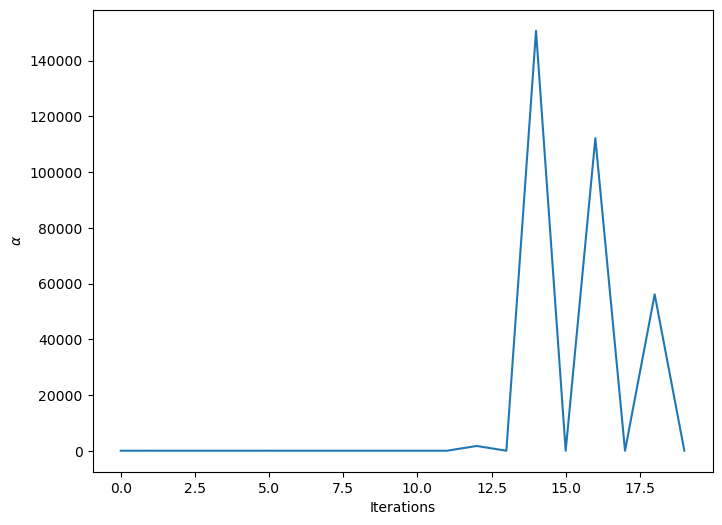

In [266]:
bvalue = dekker("function", -1, 1, 1e-6, 100);
eta = np.zeros(len(bvalue))
q = 1
x_star = -0.93097899

for i in range(len(bvalue)-1):
    eta[i+1] = np.abs((x_star - bvalue[i+1]))/np.abs((x_star - bvalue[i]))
plt.figure(figsize=(8, 6))
plt.plot(eta)
plt.ylabel(r'$\alpha$')
plt.xlabel('Iterations')

**Exercise 2:** We want to solve numerically the nonlinear system of equations: find $(x,y) \in \R ^2$ subject to:
$$
F_1(x,y) = (x-1)^{2} + y^{2} - 1 = 0 \tag{4-a}
$$
$$
F_2(x,y) = \cos(2x)-y = 0 \tag{4-b}
$$
**(a)** Derive the analytical formulas for the four elements of the Jacobiam matrix. **[4 marks]**

The Jacobian matrix can be found by taking the partial derivatives of $F_1$ and $F_2$ with respect to $x$ and $y$ individually, and then assembling them as can be shown below.
$$
J = 
\begin{bmatrix}
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y} \\
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}
\end{bmatrix}
=
\begin{bmatrix}
2x-2 & 2y \\
-2\sin(2x) & -1
\end{bmatrix}
$$


**(b)** Plot the isocontours of the function $\phi (x) = ||F(x)||^2$ within the square $(x,y) \in [-2,2] \times [-2,2]$. How many local minima does the function $\phi$ appear to have in this region? **[2 marks]**

The function $\phi (x) = ||F(x)||^2$ is defined as the squared norm, which is given by:

$$
\phi (x) = ||F(x)||^2 = \sum _{n = 1}^{n} F_{n}(x,y)^2 = ((x-1)^2 + y^2 - 1)^2 +(\cos(2x)-y)^2 
$$

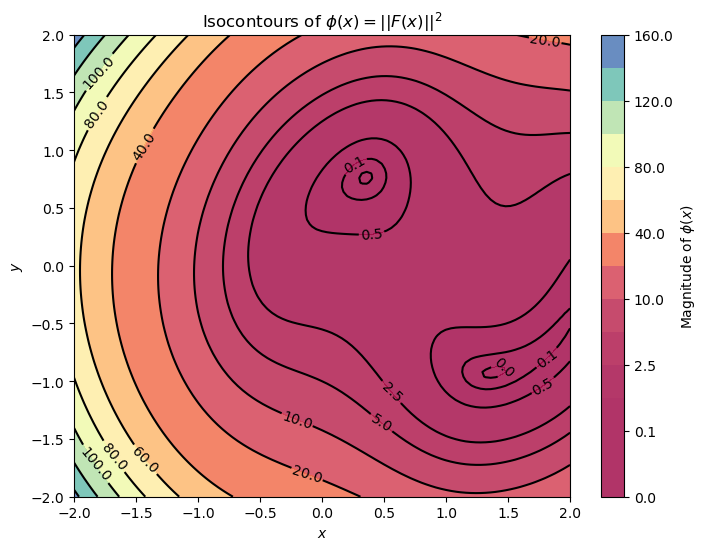

In [275]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,101)
y = np.linspace(-2,2,101)

X, Y = np.meshgrid(x, y)

def func(X,Y):
    return ((X-1)**2 + Y**2 - 1)**2 + (np.cos(2*X) - Y)**2

levels = [0,0.01,0.1,0.5,2.5,5,10,20,40,60,80,100,120,140,160]
plt.figure(figsize=(8, 6))
contourplot = plt.contourf(X, Y, func(X, Y), levels=levels, alpha=0.8, cmap=plt.cm.Spectral)
C = plt.contour(X, Y, func(X,Y), levels=levels, colors='black')
plt.clabel(C, inline=1, fontsize=10)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Isocontours of $ \phi (x) = ||F(x)||^2$')
plt.colorbar(contourplot, label=r'Magnitude of $ \phi(x) $')
plt.show()



It can be observed that there are two local minima. These are characterised by the swirls converging on singular points, and can also be seen in the colourbar where the contours are most pink.

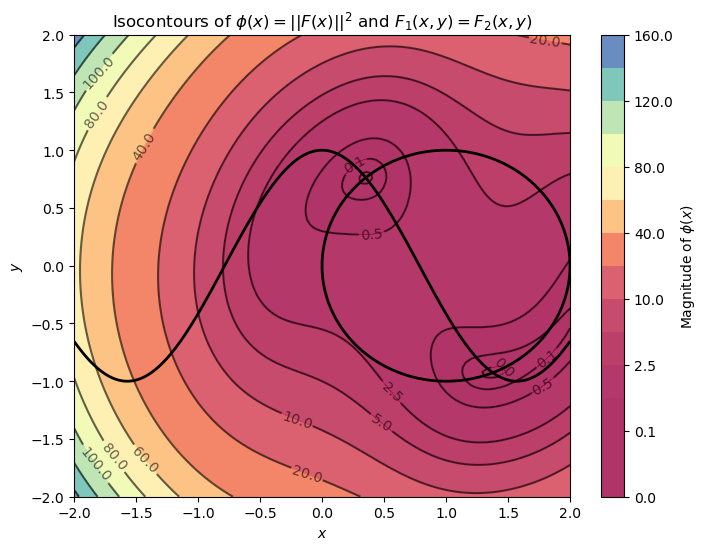

In [280]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,101)
y = np.linspace(-2,2,101)

X, Y = np.meshgrid(x, y)

def func(X,Y):
    return ((X-1)**2 + Y**2 - 1)**2 + (np.cos(2*X) - Y)**2

levels = [0,0.01,0.1,0.5,2.5,5,10,20,40,60,80,100,120,140,160]


xvec = np.linspace(-2,2,251)
yvec = np.linspace(-2,2,251)

x1, x2 = np.meshgrid(xvec, yvec)

F1 = (x1 - 1)**2 + x2**2 - 1
F2 = np.cos(2*x1) - x2
linewidth = 1.2

plt.figure(figsize=(8, 6))
contourplot = plt.contourf(X, Y, func(X, Y), levels=levels, alpha=0.8, cmap=plt.cm.Spectral)

C = plt.contour(X, Y, func(X,Y), levels=levels, colors='black', alpha=0.6)
D = plt.contour(x1, x2, F1, colors='black', levels=[0], linewidths = 2)
E = plt.contour(x1,x2, F2, colors='black', levels=[0], linewidths = 2)

plt.clabel(C, inline=1, fontsize=10)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Isocontours of $ \phi (x) = ||F(x)||^2$' + ' and $F_1(x,y) = F_2(x,y)$')
plt.colorbar(contourplot, label=r'Magnitude of $ \phi(x) $')
plt.show()

x = [0], y = [-1], k = 0
x = [0.2], y = [-0.6], k = 1, lambda = 0.05, tol = [1.52106099]
x = [0.31846581], y = [-0.4478939], k = 2, lambda = 0.05, tol = [1.29584279]
x = [0.37905354], y = [-0.3527122], k = 3, lambda = 0.05, tol = [1.18492137]
x = [0.39225329], y = [-0.27939428], k = 4, lambda = 0.05, tol = [1.13127175]
x = [0.37786317], y = [-0.21155885], k = 5, lambda = 0.05, tol = [1.09780862]
x = [0.35012806], y = [-0.14166667], k = 6, lambda = 0.05, tol = [1.06413044]
x = [0.31637463], y = [-0.06683087], k = 7, lambda = 0.05, tol = [1.02055137]
x = [0.28059547], y = [0.01343281], k = 8, lambda = 0.05, tol = [0.96270185]
x = [0.245759], y = [0.09804738], k = 9, lambda = 0.05, tol = [0.88974736]
x = [0.2147032], y = [0.18466993], k = 10, lambda = 0.05, tol = [0.80430562]
x = [0.19019686], y = [0.2700218], k = 11, lambda = 0.05, tol = [0.71219764]
x = [0.17451322], y = [0.35052324], k = 12, lambda = 0.05, tol = [0.62083564]
x = [0.16883971], y = [0.42316136], k = 13, lambda = 0.05, to

/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/1150370965.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[0,0] = -2*x - 2
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/1150370965.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[0,1] = 2*y
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/1150370965.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[1,0] = -2*np.sin(2*x)


Text(0.5, 1.0, 'k = 61 iterations')

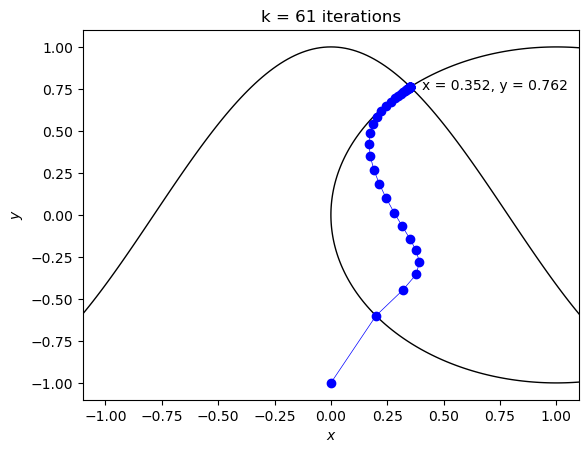

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def vector_norm(X,Y):
    return np.sqrt(((X-1)**2 + Y**2 - 1)**2 + (np.cos(2*X) - Y)**2)
    
def system(x,y):
    F = np.zeros((2,1))
    F[0] = ((x-1)**2 + y**2 - 1)
    F[1] = (np.cos(2*x) - y)
    return F


def Jacobian(x,y):
    '''
    Computes the Jacobian of the system of equations
    '''
    J = np.zeros((2,2), dtype=np.float64)
    J[0,0] = -2*x - 2
    J[0,1] = 2*y
    J[1,0] = -2*np.sin(2*x)
    J[1,1] = -1
    return J

def GradientDescent(x0,y0,delta,tol,maxit):
    """
    Gradient Descent Method with line search. Author: James Baxter Chapman

    Parameters
    ----------
    x0 
    """

    # Initial states
    x = np.array(([x0],[y0]))
    x_values = []
    iter = []
    print('x = ' + str([x0]) + ', y = ' + str([y0]) + ', k = 0')
    k = 0
    
    while vector_norm(x[0],x[1]) > tol and (k < maxit):
        d = -2 * np.transpose(Jacobian(x[0],x[1])) @ system(x[0],x[1])  
        x1 = x + delta*d
        x = x1.copy()
        k += 1
        print('x = ' + str(x[0]) + ', y = ' + str(x[1]) + ', k = ' + str(k) + ', lambda = ' + str(delta) + ', tol = ' + str(vector_norm(x[0], x[1])))
  
                
        x_values.append(x) 
        iter.append(k)
    return x_values, iter


x0 = 0
y0 = -1
x_values, iter = GradientDescent(x0,y0,0.05,1e-6,200)

xvalues = np.reshape(x_values, (len(x_values),2))

xval = xvalues[:,0]
yval = xvalues[:,1]

xval = np.concatenate((np.array([x0]), xval))
yval = np.concatenate((np.array([y0]), yval))


F1 = (x1 - 1)**2 + x2**2 - 1
F2 = np.cos(2*x1) - x2

D = plt.contour(x1, x2, F1, colors='black', levels=[0], linewidths = 1)
E = plt.contour(x1,x2, F2, colors='black', levels=[0], linewidths = 1)
plt.plot(xval, yval, '-o', color='blue', lw=0.5)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text((xval[-1] + 0.05), (yval[-1] - 0.02), 'x = ' + (str((round(xval[-1], 3))) + ', y = ' + str((round(yval[-1],3)))))
plt.title('k = ' + str(iter[-1]) + ' iterations')


x = [0], y = [-1], k = 0
x = [0.2], y = [-0.6], k = 1, lambda = 0.05, gamma = 0.1, tol = [1.52106099]
x = [0.33846581], y = [-0.4078939], k = 2, lambda = 0.05, gamma = 0.1, tol = [1.25168393]
x = [0.39506472], y = [-0.30224885], k = 3, lambda = 0.05, gamma = 0.1, tol = [1.14304969]
x = [0.3922463], y = [-0.22389015], k = 4, lambda = 0.05, gamma = 0.1, tol = [1.09769655]
x = [0.36195626], y = [-0.14888462], k = 5, lambda = 0.05, gamma = 0.1, tol = [1.06410945]
x = [0.32243117], y = [-0.06856828], k = 6, lambda = 0.05, gamma = 0.1, tol = [1.02004935]
x = [0.28098043], y = [0.01888519], k = 7, lambda = 0.05, gamma = 0.1, tol = [0.95782283]
x = [0.24134887], y = [0.11218621], k = 8, lambda = 0.05, gamma = 0.1, tol = [0.87637067]
x = [0.20694535], y = [0.20811334], k = 9, lambda = 0.05, gamma = 0.1, tol = [0.77968402]
x = [0.18129262], y = [0.30209299], k = 10, lambda = 0.05, gamma = 0.1, tol = [0.6763224]
x = [0.16728588], y = [0.38918725], k = 11, lambda = 0.05, gamma = 0.1, tol = [0.5766

<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:62: SyntaxWarning: invalid escape sequence '\g'
<>:63: SyntaxWarning: invalid escape sequence '\g'
<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:62: SyntaxWarning: invalid escape sequence '\g'
<>:63: SyntaxWarning: invalid escape sequence '\g'
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/2309572498.py:61: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(xval_0_1, yval_0_1, '-o', color='blue', lw=1, label='$\gamma = 0.1$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/2309572498.py:62: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(xval_0_3, yval_0_3, '-o', color='green', lw=1, label='$\gamma = 0.3$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/2309572498.py:63: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(xval_0_7, yval_0_7, '-o', color='red', lw=1, label='$\gamma = 0.7$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/11503

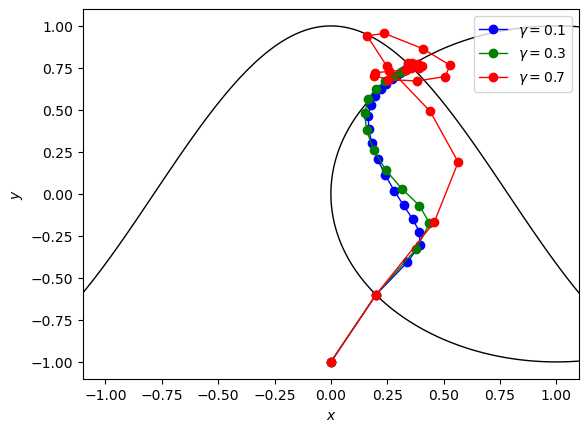

In [332]:
def MomentumGradientDescent(x0,y0,delta,gamma,tol,maxit):
    """
    Gradient Descent Method without line search. Author: James Baxter Chapman

    Parameters
    ----------
    x0 
    """

    # Initial states
    x = np.array(([x0],[y0]))
    x_values = []
    iter = []
    print('x = ' + str([x0]) + ', y = ' + str([y0]) + ', k = 0')
    k = 0
    d_last = 0
    while vector_norm(x[0],x[1]) > tol and (k < maxit):
        d = gamma*d_last + 2 * np.transpose(Jacobian(x[0],x[1])) @ system(x[0],x[1])  
        x1 = x - delta*d
        x = x1.copy()
        d_last = d.copy()
        k += 1
        print('x = ' + str(x[0]) + ', y = ' + str(x[1]) + ', k = ' + str(k) + ', lambda = ' + str(delta) +  ', gamma = ' + str(gamma) + ', tol = ' + str(vector_norm(x[0], x[1])))
  
                
        x_values.append(x) 
        iter.append(k)
    return x_values, iter

x0 = 0
y0 = -1
x_values_0_1, iter_0_1= MomentumGradientDescent(x0,y0,0.05,0.1,1e-6,200)
x_values_0_3, iter_0_3= MomentumGradientDescent(x0,y0,0.05,0.3,1e-6,200)
x_values_0_7, iter_0_7= MomentumGradientDescent(x0,y0,0.05,0.7,1e-6,200)


F1 = (x1 - 1)**2 + x2**2 - 1
F2 = np.cos(2*x1) - x2

D = plt.contour(x1, x2, F1, colors='black', levels=[0], linewidths = 1)
E = plt.contour(x1,x2, F2, colors='black', levels=[0], linewidths = 1)

x_values_0_1 = np.reshape(x_values_0_1, (len(x_values_0_1),2))
x_values_0_3 = np.reshape(x_values_0_3, (len(x_values_0_3),2))
x_values_0_7 = np.reshape(x_values_0_7, (len(x_values_0_7),2))

xval_0_1 = x_values_0_1[:,0]
xval_0_3 = x_values_0_3[:,0]
xval_0_7 = x_values_0_7[:,0]
yval_0_1 = x_values_0_1[:,1]
yval_0_3 = x_values_0_3[:,1]
yval_0_7 = x_values_0_7[:,1]

xval_0_1 = np.concatenate((np.array([x0]), xval_0_1))
xval_0_3 = np.concatenate((np.array([x0]), xval_0_3))
xval_0_7 = np.concatenate((np.array([x0]), xval_0_7))
yval_0_1 = np.concatenate((np.array([y0]), yval_0_1))
yval_0_3 = np.concatenate((np.array([y0]), yval_0_3))
yval_0_7 = np.concatenate((np.array([y0]), yval_0_7))

plt.plot(xval_0_1, yval_0_1, '-o', color='blue', lw=1, label='$\gamma = 0.1$')
plt.plot(xval_0_3, yval_0_3, '-o', color='green', lw=1, label='$\gamma = 0.3$')
plt.plot(xval_0_7, yval_0_7, '-o', color='red', lw=1, label='$\gamma = 0.7$')

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

